# Project Description

we performed several steps to train and evaluate a model for sentiment analysis on drug reviews.

Firstly, we pre-processed the data by performing tasks such as data cleaning, text normalization, and tokenization. We also used Glove embedding to represent words as dense vectors.

Then, we trained two models, LSTM and LSTM-CNN, using the pre-processed data. We evaluated the performance of the models on the test data from drugsComTest_raw.csv.

Next, we performed evaluation on the test data, including calculating accuracy, precision, recall, and F1-score.

We also generated training and validation curves to visualize the performance of the models during training.

Finally, we plotted the confusion matrix to gain insight into the performance of the models in predicting the sentiment of drug reviews.


In [47]:
import os
import re
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from keras import layers
from sklearn.model_selection import train_test_split
#from tensorflow.keras.models import Sequential
from keras.models import Sequential
#from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout
#from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D,LSTM

from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import regularizers
from keras import backend as K
from keras.models import load_model
from keras.models import model_from_json
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.layers.core import Dense, Activation, Dropout



In [3]:
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Loading dataset

In [4]:
#df = pd.read_csv("/content/drive/My Drive/Sentiment_Analysis/drugsComTrain_raw.csv")
df = pd.read_csv('drugsComTrain_raw.csv')
Test_dataset=pd.read_csv('drugsComTest_raw.csv')

In [5]:

print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB
None


In [6]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [7]:
Test_dataset.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [8]:
df.shape

(161297, 7)

In [9]:
Test_dataset.shape

(53766, 7)

In [10]:
df.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [11]:
Test_dataset.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
df['rating'].value_counts()

10    50989
9     27531
1     21619
8     18890
7      9456
5      8013
2      6931
3      6513
6      6343
4      5012
Name: rating, dtype: int64

In [13]:
Prediction_Train_data = pd.DataFrame({'rating':df.rating,
                                     'condition':df.condition,
                                     'review':df.review})


In [14]:
Prediction_Test_data = pd.DataFrame({'rating':Test_dataset.rating,
                                     'condition':Test_dataset.condition,
                                     'review':Test_dataset.review})

In [15]:
report=['condition','review']

In [16]:
Prediction_Train_data['report'] = Prediction_Train_data[report].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
Prediction_Test_data['report'] = Prediction_Test_data[report].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [17]:
Prediction_Train_data['report'] 

0         Left Ventricular Dysfunction_"It has no side e...
1         ADHD_"My son is halfway through his fourth wee...
2         Birth Control_"I used to take another oral con...
3         Birth Control_"This is my first time using any...
4         Opiate Dependence_"Suboxone has completely tur...
                                ...                        
161292    Alcohol Dependence_"I wrote my first report in...
161293    Nausea/Vomiting_"I was given this in IV before...
161294    Rheumatoid Arthritis_"Limited improvement afte...
161295    Underactive Thyroid_"I&#039;ve been on thyroid...
161296    Constipation, Chronic_"I&#039;ve had chronic c...
Name: report, Length: 161297, dtype: object

In [18]:
Prediction_Test_data['report']

0        Depression_"I&#039;ve tried a few antidepressa...
1        Crohn's Disease, Maintenance_"My son has Crohn...
2        Urinary Tract Infection_"Quick reduction of sy...
3        Weight Loss_"Contrave combines drugs that were...
4        Birth Control_"I have been on this birth contr...
                               ...                        
53761    Breast Cancer, Prevention_"I have taken Tamoxi...
53762    Anxiety_"I&#039;ve been taking Lexapro (escita...
53763    Birth Control_"I&#039;m married, 34 years old ...
53764    Pain_"I was prescribed Nucynta for severe neck...
53765                               Sciatica_"It works!!!"
Name: report, Length: 53766, dtype: object

In [19]:
# Labeling of ratings as Postive, Negative and Neutral for sentimentclassification
Prediction_Train_data['Sentiment'] = [ 'Negative' if (x<=4) else 'Neutral' if (4<x<=7) else 'Positive' for x in Prediction_Train_data['rating']]
Prediction_Test_data['Sentiment'] = [ 'Negative' if (x<=4) else 'Neutral' if (4<x<=7) else 'Positive' for x in Prediction_Test_data['rating']]

In [20]:
Prediction_Train_data['Sentiment']

0         Positive
1         Positive
2          Neutral
3         Positive
4         Positive
            ...   
161292    Positive
161293    Negative
161294    Negative
161295    Positive
161296    Positive
Name: Sentiment, Length: 161297, dtype: object

In [21]:
Prediction_Test_data['Sentiment']

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
53761    Positive
53762    Positive
53763    Positive
53764    Negative
53765    Positive
Name: Sentiment, Length: 53766, dtype: object

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

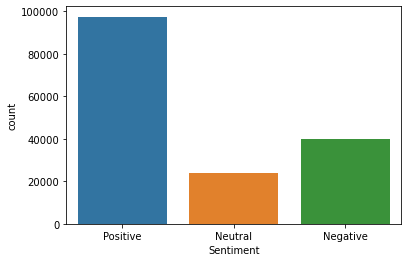

In [22]:
sns.countplot(x=Prediction_Train_data['Sentiment'])

In [23]:
# Dropping the columns that are not required for the neural network.
Prediction_Train_data.drop(['rating','condition','review'],axis=1)


,report,Sentiment
0,"Left Ventricular Dysfunction_""It has no side e...",Positive
1,"ADHD_""My son is halfway through his fourth wee...",Positive
2,"Birth Control_""I used to take another oral con...",Neutral
3,"Birth Control_""This is my first time using any...",Positive
4,"Opiate Dependence_""Suboxone has completely tur...",Positive
...,...,...
161292,"Alcohol Dependence_""I wrote my first report in...",Positive
161293,"Nausea/Vomiting_""I was given this in IV before...",Negative
161294,"Rheumatoid Arthritis_""Limited improvement afte...",Negative
161295,"Underactive Thyroid_""I&#039;ve been on thyroid...",Positive


In [24]:
Prediction_Test_data.drop(['rating','condition','review'],axis=1)

,report,Sentiment
0,"Depression_""I&#039;ve tried a few antidepressa...",Positive
1,"Crohn's Disease, Maintenance_""My son has Crohn...",Positive
2,"Urinary Tract Infection_""Quick reduction of sy...",Positive
3,"Weight Loss_""Contrave combines drugs that were...",Positive
4,"Birth Control_""I have been on this birth contr...",Positive
...,...,...
53761,"Breast Cancer, Prevention_""I have taken Tamoxi...",Positive
53762,"Anxiety_""I&#039;ve been taking Lexapro (escita...",Positive
53763,"Birth Control_""I&#039;m married, 34 years old ...",Positive
53764,"Pain_""I was prescribed Nucynta for severe neck...",Negative


# **per-processing Data(Text data cleaning)**

In [25]:
def clean_text (text):
    # Remove Pre and Post Spaces
    text = str(text).strip()
    
    # Lower case the entire text
    text = str(text).lower()

    # Substitute New Line Characters with spaces 
    text = re.sub(r"\n", r" ", text)
        
    # Tokenize the sentence
    word_tokens = word_tokenize(text)
    
    # Remove the punctuation and  special characters from each individual word
    cleaned_text = []
    for word in word_tokens:
        cleaned_text.append("".join([char for char in word if char.isalnum()]))
    
    # Specify the stop words list
    stop_words = stopwords.words('english')
    
    # Remove the stopwords and words containing less then 2 characters
    text_tokens = [word for word in cleaned_text if (len(word) > 2) and (word not in stop_words)]
    
    #Lemmatize each word in the word list
    text = lemmatize (text_tokens)
    
    return text

In [26]:
def get_wordnet_pos (tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [27]:
def lemmatize (word_list):
    wl = WordNetLemmatizer()
    word_pos_tags = pos_tag(word_list)
    lemmatized_list = []
    for tag in word_pos_tags:
        lemmatize_word = wl.lemmatize(tag[0],get_wordnet_pos(tag[1]))
        lemmatized_list.append(lemmatize_word)
    return " ".join(lemmatized_list)


In [28]:
Prediction_Train_data['report'] = Prediction_Train_data['report'].map(lambda x: clean_text(x))


In [29]:
Prediction_Test_data['report'] = Prediction_Test_data['report'].map(lambda x: clean_text(x))

In [30]:
Sentiment_train = Prediction_Train_data['Sentiment']
Report_train = Prediction_Train_data['report']
Sentiment_test = Prediction_Test_data['Sentiment']
Report_test = Prediction_Test_data['report']

In [31]:
Sentiment_train

0         Positive
1         Positive
2          Neutral
3         Positive
4         Positive
            ...   
161292    Positive
161293    Negative
161294    Negative
161295    Positive
161296    Positive
Name: Sentiment, Length: 161297, dtype: object

In [32]:
Report_train


0         leave ventricular dysfunction side effect take...
1         adhd son halfway fourth week intuniv become co...
2         birth control use take another oral contracept...
3         birth control first time use form birth contro...
4         opiate dependence suboxone completely turn lif...
                                ...                        
161292    alcohol dependence write first report midoctob...
161293    nauseavomiting give surgey immediately become ...
161294    rheumatoid arthritis limit improvement month d...
161295    underactive thyroid 039 thyroid medication yea...
161296    constipation chronic 039 chronic constipation ...
Name: report, Length: 161297, dtype: object

In [33]:
from numpy import array
# One-Hot Encoding of Sentiment_Train
Sentiment_train = array(Sentiment_train)
# integer encode
label_encoder = LabelEncoder()
Sentiment_train_integer_encoded = label_encoder.fit_transform(Sentiment_train)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
Sentiment_train_integer_encoded = Sentiment_train_integer_encoded.reshape(len(Sentiment_train_integer_encoded), 1)
Sentiment_train_onehot_encoded = onehot_encoder.fit_transform(Sentiment_train_integer_encoded)
# One-Hot Encoding of Sentiment_Test
Sentiment_test = array(Sentiment_test)
# integer encode
label_encoder = LabelEncoder()
Sentiment_test_integer_encoded = label_encoder.fit_transform(Sentiment_test)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
Sentiment_test_integer_encoded = Sentiment_test_integer_encoded.reshape(len(Sentiment_test_integer_encoded), 1)
Sentiment_test_onehot_encoded = onehot_encoder.fit_transform(Sentiment_test_integer_encoded)
print("Sentiment_Train shape after one-hot encoding : ",Sentiment_train_onehot_encoded.shape,"  "
     ,"Sentiment_Test shape after one-hot encoding : ",Sentiment_test_onehot_encoded.shape,"\n")

Sentiment_Train shape after one-hot encoding :  (161297, 3)    Sentiment_Test shape after one-hot encoding :  (53766, 3) 



In [34]:
# Tokenize and Create Sequence For Train set
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(Report_train)
Report_train_sequences = tokenizer.texts_to_sequences(Report_train)
Report_train_padded = pad_sequences(Report_train_sequences, maxlen=100, padding='post', truncating='post')             # maxlen is the size of words in a review here it is 100
# Tokenize and Create Sequence For Test set
Report_test_sequences = tokenizer.texts_to_sequences(Report_test)
Report_test_padded = pad_sequences(Report_test_sequences, maxlen=100, padding='post', truncating='post')
print("Report_Train shape after padding : ",Report_train_padded.shape,"  ","Report_Test shape after padding: ",Report_test_padded.shape)
Sentiment_labels = ['Negative', 'Neutral', 'Positive']              #  0:Negative   1: Neutral  2:Positive

Report_Train shape after padding :  (161297, 100)    Report_Test shape after padding:  (53766, 100)


In [35]:
Report_test_padded

array([[  41,    1,  326, ...,    0,    0,    0],
       [1125,  413,  752, ...,    0,    0,    0],
       [ 506,  531,   80, ...,    0,    0,    0],
       ...,
       [  17,   13,    1, ...,    0,    0,    0],
       [   9,   84, 1634, ...,    0,    0,    0],
       [1691,    7,    0, ...,    0,    0,    0]])

In [36]:
tokenizer.index_word

{1: '039',
 2: 'take',
 3: 'day',
 4: 'get',
 5: 'month',
 6: 'year',
 7: 'work',
 8: 'week',
 9: 'pain',
 10: 'start',
 11: 'effect',
 12: 'side',
 13: 'control',
 14: 'time',
 15: 'go',
 16: 'feel',
 17: 'birth',
 18: 'first',
 19: 'like',
 20: 'pill',
 21: 'period',
 22: 'use',
 23: 'bad',
 24: 'make',
 25: 'help',
 26: 'well',
 27: 'would',
 28: 'anxiety',
 29: 'back',
 30: 'try',
 31: 'medication',
 32: 'one',
 33: 'doctor',
 34: 'weight',
 35: 'also',
 36: 'good',
 37: 'give',
 38: 'medicine',
 39: 'since',
 40: 'life',
 41: 'depression',
 42: 'still',
 43: 'stop',
 44: 'really',
 45: 'much',
 46: 'experience',
 47: 'sleep',
 48: 'acne',
 49: 'never',
 50: 'hour',
 51: 'two',
 52: 'quot',
 53: 'say',
 54: 'last',
 55: 'felt',
 56: 'think',
 57: 'night',
 58: 'even',
 59: 'every',
 60: 'gain',
 61: 'great',
 62: 'drug',
 63: 'thing',
 64: 'cramp',
 65: 'ago',
 66: 'lose',
 67: 'dose',
 68: 'little',
 69: 'come',
 70: 'put',
 71: 'find',
 72: 'know',
 73: 'problem',
 74: 'almost',


In [37]:
import os

home = 'C:\\Users\\Sena\\Desktop\\final_Sentiment_Analysis\\'
glove_embedding_filepath = os.path.join(home, "glove.6B.300d.txt")


In [38]:
glove_embedding_filepath 

'C:\\Users\\Sena\\Desktop\\final_Sentiment_Analysis\\glove.6B.300d.txt'

In [39]:
def create_embedding_matrix (filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    
    with open(filepath, encoding='utf-8') as file:
        for line in file:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
    
    return embedding_matrix

In [40]:
embedding_dim = 100
embedding_matrix = create_embedding_matrix(glove_embedding_filepath, tokenizer.word_index, embedding_dim)


In [41]:
len(embedding_matrix)

60563

In [42]:
embedding_matrix.shape

(60563, 100)

In [43]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint_filepath = os.getcwd()
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)
callbacks = [EarlyStopping(patience=2), model_checkpoint_callback]

# Training LSTM

In [110]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers import Embedding, Conv1D, LSTM, Dense, Dropout
vocab_size = len(tokenizer.index_word) + 1
sequence_len=100
num_epochs = 5
batch_size = 128
LSTM_model_em = Sequential()
LSTM_model_em.add(layers.Embedding(input_dim=vocab_size, output_dim=100, input_length=sequence_len, weights = [embedding_matrix], trainable = True))
LSTM_model_em.add(SpatialDropout1D(0.3))
LSTM_model_em.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))
LSTM_model_em.add(Dense(1024, activation="relu"))
LSTM_model_em.add(Dropout(0.8))
LSTM_model_em.add(Dense(1024, activation="relu"))
LSTM_model_em.add(Dropout(0.8))
LSTM_model_em.add(Dense(3))
LSTM_model_em.add(Activation("softmax"))
LSTM_model_em.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(LSTM_model_em.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          6056300   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 100, 100)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 1024)              205824    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 1024)             

In [111]:


history_LSTM_em = LSTM_model_em.fit(Report_train_padded ,Sentiment_train_onehot_encoded, epochs=5,validation_split=0.25, batch_size = batch_size, callbacks=callbacks)


Epoch 1/5
946/946 [==============================] - 3532s 4s/step - loss: 0.8204 - accuracy: 0.6655 - val_loss: 0.6833 - val_accuracy: 0.7245
Epoch 2/5
946/946 [==============================] - 3739s 4s/step - loss: 0.7007 - accuracy: 0.7230 - val_loss: 0.6651 - val_accuracy: 0.7340
Epoch 3/5
946/946 [==============================] - 3838s 4s/step - loss: 0.6591 - accuracy: 0.7391 - val_loss: 0.6259 - val_accuracy: 0.7458
Epoch 4/5
946/946 [==============================] - 3582s 4s/step - loss: 0.6293 - accuracy: 0.7482 - val_loss: 0.6064 - val_accuracy: 0.7531
Epoch 5/5
946/946 [==============================] - 3471s 4s/step - loss: 0.6085 - accuracy: 0.7562 - val_loss: 0.6083 - val_accuracy: 0.7567


# evaluation on test data

In [82]:
import time
import itertools
import warnings
from sklearn.metrics import confusion_matrix
# Model Evaluation on Test data
test_loss,test_acc = LSTM_model_em.evaluate(Report_test_padded, Sentiment_test_onehot_encoded)
print("\n Evaluated model accuracy on test data :",test_acc)
seconds= time.time()
time_stop = time.ctime(seconds)
print("\n","stop time:", time_stop,"\n")
# Predict the values from the Test dataset
Sentiment_pred = LSTM_model_em.predict(Report_test_padded)
# Convert predictions classes to one hot vectors
Sentiment_pred_classes = np.argmax(Sentiment_pred,axis = 1)
# computing the confusion matrix


1681/1681 [==============================] - 525s 312ms/step - loss: 0.6063 - accuracy: 0.7518

 Evaluated model accuracy on test data : 0.7517762184143066

 stop time: Sat Apr 29 07:16:41 2023 

1681/1681 [==============================] - 526s 312ms/step


In [83]:
confusion_mtx = confusion_matrix(Sentiment_test_integer_encoded, Sentiment_pred_classes)
confusion_matrix


<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

# Results

In [84]:
#Printing Classification Report for Sentiment
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(Sentiment_test_integer_encoded, Sentiment_pred_classes, target_names = Sentiment_labels))
accuracy = accuracy_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Accuracy: %f' % accuracy)
cohen_score = cohen_kappa_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Cohen_score: %f' % cohen_score)

              precision    recall  f1-score   support

    Negative       0.64      0.81      0.71     13497
     Neutral       0.42      0.03      0.05      7920
    Positive       0.81      0.91      0.85     32349

    accuracy                           0.75     53766
   macro avg       0.62      0.58      0.54     53766
weighted avg       0.71      0.75      0.70     53766

Accuracy: 0.751776
Cohen_score: 0.516761


#  Training and validation curves

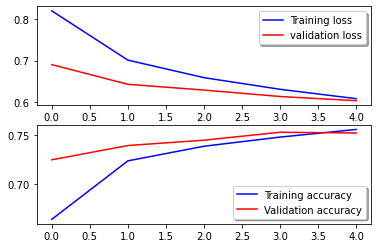

In [86]:

# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history_LSTM_em.history['loss'], color='b', label="Training loss")
ax[0].plot(history_LSTM_em.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history_LSTM_em.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_LSTM_em.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

# Plotting the confusion matrix

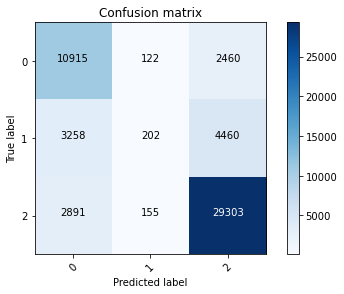

In [87]:
# Defining function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

In [ ]:
LSTM_model_em.save('my_lstm_em.h5')

# CNN-LSTM

In [48]:
# Build the CNN-LSTM model
vocab_size = len(tokenizer.index_word) + 1
sequence_len=100
modelCNN_LSTM = Sequential()
modelCNN_LSTM.add(layers.Embedding(input_dim=vocab_size, output_dim=100, input_length=sequence_len, weights = [embedding_matrix], trainable = False)) 
modelCNN_LSTM.add(Conv1D(64, 5, activation='relu'))
modelCNN_LSTM.add(MaxPooling1D(pool_size=4))
modelCNN_LSTM.add(LSTM(64))
modelCNN_LSTM.add(Dense(len(label_encoder.classes_), activation='softmax'))
# Compile the model
modelCNN_LSTM.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(modelCNN_LSTM.summary())
# Train the model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          6056300   
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 64)            32064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 24, 64)           0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 6,121,583
Trainable params: 65,283
Non-trainable params: 6,056,300
_______________________________________

In [51]:
historyCNN_LSTM  = modelCNN_LSTM.fit(Report_train_padded ,Sentiment_train_onehot_encoded, epochs=15,validation_split=0.25, batch_size = 128)


Epoch 1/15
946/946 [==============================] - 83s 88ms/step - loss: 0.4981 - accuracy: 0.8047 - val_loss: 0.6581 - val_accuracy: 0.7454
Epoch 2/15
946/946 [==============================] - 74s 79ms/step - loss: 0.4813 - accuracy: 0.8119 - val_loss: 0.6578 - val_accuracy: 0.7529
Epoch 3/15
946/946 [==============================] - 81s 86ms/step - loss: 0.4665 - accuracy: 0.8191 - val_loss: 0.6673 - val_accuracy: 0.7553
Epoch 4/15
946/946 [==============================] - 71s 75ms/step - loss: 0.4549 - accuracy: 0.8242 - val_loss: 0.7474 - val_accuracy: 0.7069
Epoch 5/15
946/946 [==============================] - 72s 76ms/step - loss: 0.4385 - accuracy: 0.8323 - val_loss: 0.6878 - val_accuracy: 0.7438
Epoch 6/15
946/946 [==============================] - 74s 79ms/step - loss: 0.4261 - accuracy: 0.8377 - val_loss: 0.6765 - val_accuracy: 0.7475
Epoch 7/15
946/946 [==============================] - 79s 83ms/step - loss: 0.4122 - accuracy: 0.8454 - val_loss: 0.6677 - val_accuracy:

# evaluation on test data

In [52]:
import time
import itertools
import warnings
from sklearn.metrics import confusion_matrix
# Model Evaluation on Test data
test_loss,test_acc = modelCNN_LSTM.evaluate(Report_test_padded, Sentiment_test_onehot_encoded)
print("\n Evaluated model accuracy on test data :",test_acc)
seconds= time.time()
time_stop = time.ctime(seconds)
print("\n","stop time:", time_stop,"\n")
# Predict the values from the Test dataset
Sentiment_pred = modelCNN_LSTM.predict(Report_test_padded)
# Convert predictions classes to one hot vectors
Sentiment_pred_classes = np.argmax(Sentiment_pred,axis = 1)
# computing the confusion matrix

1681/1681 [==============================] - 27s 16ms/step - loss: 0.7165 - accuracy: 0.7643

 Evaluated model accuracy on test data : 0.7643306255340576

 stop time: Thu May  4 15:02:32 2023 

1681/1681 [==============================] - 27s 15ms/step


In [53]:
confusion_mtx = confusion_matrix(Sentiment_test_integer_encoded, Sentiment_pred_classes)
confusion_matrix


<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

# Results

In [54]:
#Printing Classification Report for Sentiment
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(Sentiment_test_integer_encoded, Sentiment_pred_classes, target_names = Sentiment_labels))
accuracy = accuracy_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Accuracy: %f' % accuracy)
cohen_score = cohen_kappa_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Cohen_score: %f' % cohen_score)

              precision    recall  f1-score   support

    Negative       0.73      0.71      0.72     13497
     Neutral       0.46      0.35      0.40      7920
    Positive       0.83      0.89      0.86     32349

    accuracy                           0.76     53766
   macro avg       0.67      0.65      0.66     53766
weighted avg       0.75      0.76      0.76     53766

Accuracy: 0.764331
Cohen_score: 0.558691


# Training and validation curves

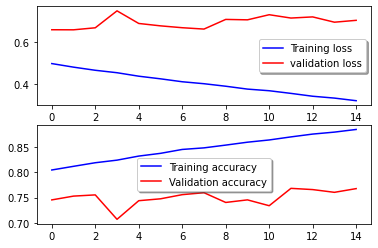

In [55]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(historyCNN_LSTM.history['loss'], color='b', label="Training loss")
ax[0].plot(historyCNN_LSTM.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(historyCNN_LSTM.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(historyCNN_LSTM.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

# Plotting the confusion matrix

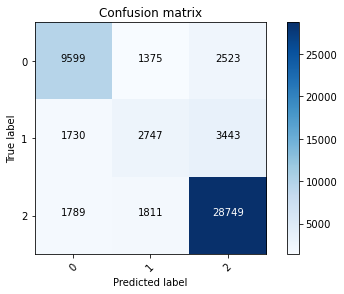

In [56]:
# Defining function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

In [ ]:
modelCNN_LSTM .save('my_LSTM_CNN_em.h5')